In [2]:
import pandas as pd

In [3]:
raw_data = pd.read_csv("Air_Quality.csv")

In [4]:
raw_data.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,16122.000000,16122.000000,1.612200e+04,16122.000000,0.0
mean,339480.955589,427.131063,6.133394e+05,19.129163,NaN
std,194099.809551,109.657607,7.916715e+06,21.673789,NaN
min,130355.000000,365.000000,1.000000e+00,0.000000,NaN
25%,172183.250000,365.000000,2.020000e+02,8.460000,NaN
50%,221882.500000,375.000000,3.030000e+02,13.900000,NaN
75%,547749.750000,386.000000,4.040000e+02,25.470000,NaN
max,671122.000000,661.000000,1.051061e+08,424.700000,NaN


In [6]:
raw_data.sample(n=10)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
6669,211462,383,Sulfur Dioxide (SO2),Mean,ppb,UHF34,209,Bensonhurst - Bay Ridge,Winter 2013-14,12/01/2013,0.95,NaN
1245,151632,643,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,UHF42,203,Bedford Stuyvesant - Crown Heights,2005,01/01/2005,33.80,NaN
3101,169374,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,313,Coney Island (CD13),Summer 2010,06/01/2010,11.32,NaN
1402,154474,645,Traffic Density- Annual Vehicle Miles Traveled...,million miles,per km2,CD,309,South Crown Heights and Lefferts Gardens (CD9),2005,01/01/2005,0.90,NaN
12682,550163,375,Nitrogen Dioxide (NO2),Mean,ppb,CD,502,South Beach and Willowbrook (CD2),Annual Average 2017,01/01/2017,13.19,NaN
14404,643550,375,Nitrogen Dioxide (NO2),Mean,ppb,CD,101,Financial District (CD1),Summer 2019,06/01/2019,23.26,NaN
11255,518537,653,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,406,Fresh Meadows,2012-2014,01/02/2012,57.70,NaN
7838,216516,386,Ozone (O3),Mean,ppb,CD,316,Brownsville (CD16),Summer 2013,06/01/2013,30.74,NaN
3039,169312,365,Fine Particulate Matter (PM2.5),Mean,mcg per cubic meter,CD,310,Bay Ridge and Dyker Heights (CD10),Summer 2009,06/01/2009,10.77,NaN
10179,405314,383,Sulfur Dioxide (SO2),Mean,ppb,CD,112,Washington Heights and Inwood (CD12),Winter 2015-16,12/01/2015,0.51,NaN


In [8]:
geo_df = raw_data[['Geo Type Name', 'Geo Place Name']]
geo_df.sample(n=10)

,Geo Type Name,Geo Place Name
5434,UHF42,East Flatbush - Flatbush
584,UHF42,Long Island City - Astoria
9124,UHF34,East New York
9290,CD,East New York and Starrett City (CD5)
4533,UHF34,Coney Island - Sheepshead Bay
1749,CD,Elmhurst and Corona (CD4)
10084,CD,South Beach and Willowbrook (CD2)
5050,UHF42,Downtown - Heights - Slope
13658,CD,Jamaica and Hollis (CD12)
3100,CD,Borough Park (CD12)


In [102]:
raw_data['Name'].value_counts()

Fine Particulate Matter (PM2.5)                                                 5076
Nitrogen Dioxide (NO2)                                                          5076
Ozone (O3)                                                                      1692
Sulfur Dioxide (SO2)                                                            1128
PM2.5-Attributable Asthma Emergency Department Visits                            384
O3-Attributable Asthma Emergency Department Visits                               384
O3-Attributable Asthma Hospitalizations                                          384
Traffic Density- Annual Vehicle Miles Traveled for Cars                          214
Traffic Density- Annual Vehicle Miles Traveled                                   209
Traffic Density- Annual Vehicle Miles Traveled for Trucks                        209
PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)     192
O3-Attributable Cardiac and Respiratory Deaths                   

In [19]:
raw_data['Measure'].value_counts()

Mean                                               12972
million miles                                        632
Estimated Annual Rate- Children 0 to 17 Yrs Old      576
Estimated Annual Rate                                576
Estimated Annual Rate- 18 Yrs and Older              576
Annual Average Concentration                         310
Number per km2                                       288
Estimated Annual Rate - Adults 30 Yrs and Older      192
Name: Measure, dtype: int64

In [20]:
raw_data['Geo Type Name'].value_counts()

UHF42       6216
CD          5900
UHF34       3128
Borough      730
Citywide     148
Name: Geo Type Name, dtype: int64

<AxesSubplot:>

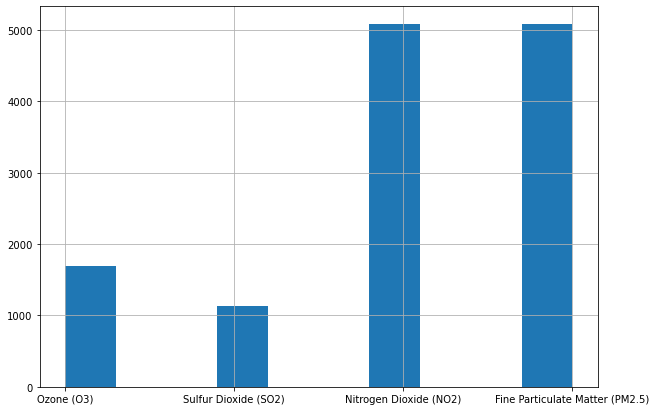

In [18]:
options = ['Fine Particulate Matter (PM2.5)', 'Nitrogen Dioxide (NO2)', 'Ozone (O3)', 'Sulfur Dioxide (SO2)']
gas_df = raw_data[raw_data['Name'].isin(options)]
gas_df['Name'].hist()


In [103]:
raw_data['Geo Type Name'].value_counts()

UHF42       6216
CD          5900
UHF34       3128
Borough      730
Citywide     148
Name: Geo Type Name, dtype: int64

In [10]:
NO2_df = raw_data[raw_data['Name']=='Nitrogen Dioxide (NO2)']
PM2_df = raw_data[raw_data['Name']=='Fine Particulate Matter (PM2.5)']
O3_df = raw_data[raw_data['Name']=='Ozone (O3)']
SO2_df = raw_data[raw_data['Name']=='Sulfur Dioxide (SO2)']

In [11]:
NO2_df = NO2_df[NO2_df['Geo Type Name'] == 'Borough']
PM2_df = PM2_df[PM2_df['Geo Type Name'] == 'Borough']
O3_df = O3_df[O3_df['Geo Type Name'] == 'Borough']
SO2_df = SO2_df[SO2_df['Geo Type Name'] == 'Borough']

In [12]:
O3_df = O3_df.sort_values(by='Time Period')
O3_df['Time Period'].value_counts()

Summer 2009    5
Summer 2010    5
Summer 2011    5
Summer 2012    5
Summer 2013    5
Summer 2014    5
Summer 2015    5
Summer 2016    5
Summer 2017    5
Summer 2018    5
Summer 2019    5
Summer 2020    5
Name: Time Period, dtype: int64

In [13]:
SO2_df = SO2_df.sort_values(by='Time Period')
SO2_df['Time Period'].value_counts()

Winter 2008-09    5
Winter 2009-10    5
Winter 2010-11    5
Winter 2011-12    5
Winter 2012-13    5
Winter 2013-14    5
Winter 2014-15    5
Winter 2015-16    5
Name: Time Period, dtype: int64

In [25]:
O3_deaths = raw_data[raw_data['Name']=='O3-Attributable Cardiac and Respiratory Deaths']
O3_deaths = O3_deaths[O3_deaths['Geo Type Name'] == 'Borough']
O3_deaths.shape

(20, 12)

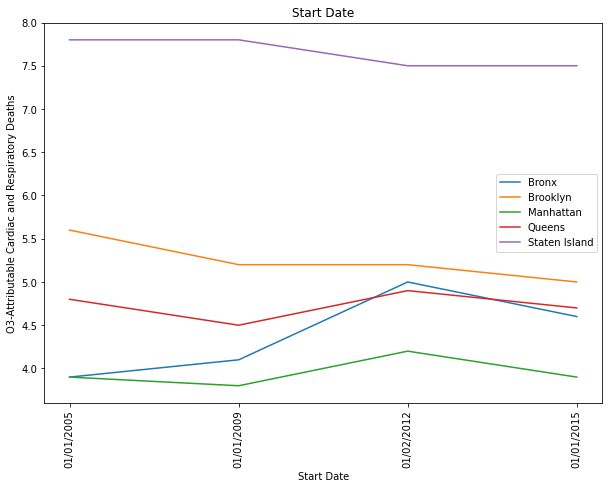

In [26]:
plot_x_y_multiline(O3_deaths, 
                   'Geo Place Name',
                   'Start_Date',
                   'Data Value',
                   'Start Date',
                   'O3-Attributable Cardiac and Respiratory Deaths',
                   'Start Date')

This happens when pollutants emitted by cars, power plants, industrial boilers, refineries, chemical plants, and other sources chemically react in the presence of sunlight. Ozone is most likely to reach unhealthy levels on hot sunny days in urban environments, but can still reach high levels during colder months.
Source: https://www.epa.gov/ground-level-ozone-pollution/ground-level-ozone-basics

In [27]:
winter_NO2 = NO2_df[NO2_df['Time Period'].str.contains('Winter')]
summer_NO2 = NO2_df[NO2_df['Time Period'].str.contains('Summer')]
annual_NO2 = NO2_df[NO2_df['Time Period'].str.contains('Annual')]

In [28]:
winter_PM2 = PM2_df[PM2_df['Time Period'].str.contains('Winter')]
summer_PM2 = PM2_df[PM2_df['Time Period'].str.contains('Summer')]
annual_PM2 = PM2_df[PM2_df['Time Period'].str.contains('Annual')]

<AxesSubplot:>

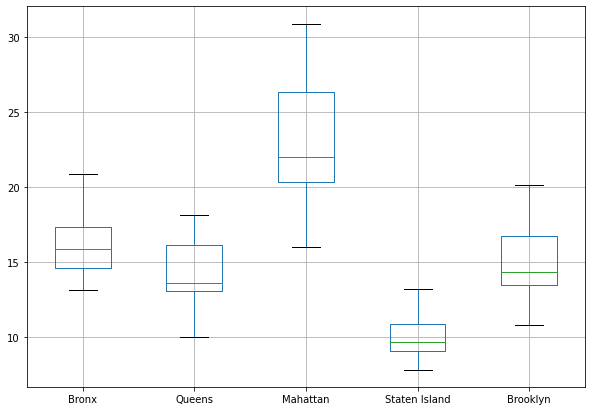

In [44]:
summer_bronx_NO2= summer_NO2[summer_NO2['Geo Place Name'] == 'Bronx']['Data Value']
summer_queens_NO2= summer_NO2[summer_NO2['Geo Place Name'] == 'Queens']['Data Value']
summer_manhattan_NO2= summer_NO2[summer_NO2['Geo Place Name'] == 'Manhattan']['Data Value']
summer_staten_NO2= summer_NO2[summer_NO2['Geo Place Name'] == 'Staten Island']['Data Value']
summer_brooklyn_NO2= summer_NO2[summer_NO2['Geo Place Name'] == 'Brooklyn']['Data Value']

summer_borough_NO2 = pd.DataFrame({"Bronx" : summer_bronx_NO2,
                     "Queens": summer_queens_NO2,
                     "Mahattan": summer_manhattan_NO2,
                     "Staten Island": summer_staten_NO2,
                     "Brooklyn": summer_brooklyn_NO2})
summer_borough_NO2.boxplot()


<AxesSubplot:>

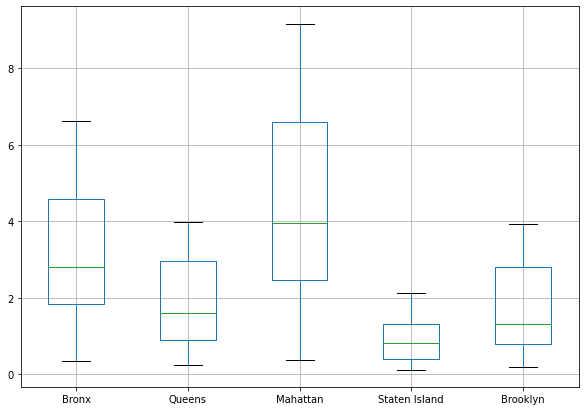

In [51]:
summer_bronx_SO2= SO2_df[SO2_df['Geo Place Name'] == 'Bronx']['Data Value']
summer_queens_SO2= SO2_df[SO2_df['Geo Place Name'] == 'Queens']['Data Value']
summer_manhattan_SO2= SO2_df[SO2_df['Geo Place Name'] == 'Manhattan']['Data Value']
summer_staten_SO2= SO2_df[SO2_df['Geo Place Name'] == 'Staten Island']['Data Value']
summer_brooklyn_SO2= SO2_df[SO2_df['Geo Place Name'] == 'Brooklyn']['Data Value']
summer_borough_SO2 = pd.DataFrame({"Bronx" : summer_bronx_SO2,
                     "Queens": summer_queens_SO2,
                     "Mahattan": summer_manhattan_SO2,
                     "Staten Island": summer_staten_SO2,
                     "Brooklyn": summer_brooklyn_SO2})
summer_borough_SO2.boxplot()

In [65]:
traffic_density_df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
8746,325193,643,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,Borough,1,Bronx,2016,01/01/2016,24.0,NaN
8747,325194,643,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,Borough,2,Brooklyn,2016,01/01/2016,23.0,NaN
8748,325195,643,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,Borough,3,Manhattan,2016,01/01/2016,46.7,NaN
8749,325196,643,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,Borough,4,Queens,2016,01/01/2016,24.8,NaN
8750,325197,643,Traffic Density- Annual Vehicle Miles Traveled,million miles,per km2,Borough,5,Staten Island,2016,01/01/2016,9.7,NaN


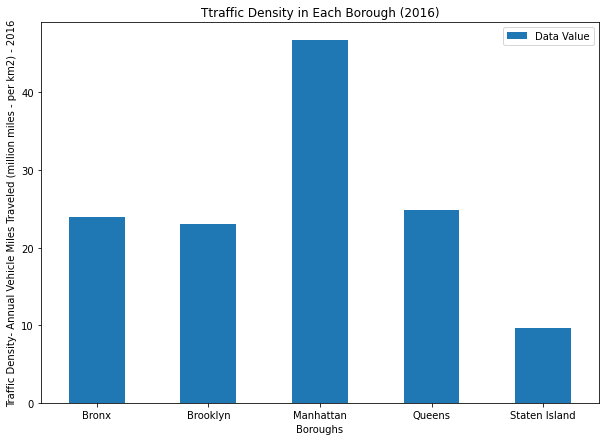

In [66]:
traffic_density_df = raw_data[raw_data['Name']=='Traffic Density- Annual Vehicle Miles Traveled']
traffic_density_df = traffic_density_df[traffic_density_df['Geo Type Name'] == 'Borough']
traffic_density_df.plot.bar(x='Geo Place Name', y='Data Value', rot=0)
plt.ylabel('Traffic Density- Annual Vehicle Miles Traveled (million miles - per km2) - 2016')
plt.xlabel('Boroughs')
plt.title('Ttraffic Density in Each Borough (2016)')
plt.show()

In [ ]:
td_bronx = traffic_density_df[traffic_density_df['Geo Place Name'] == 'Bronx']['Data Value']
td_queens = traffic_density_df[traffic_density_df['Geo Place Name'] == 'Queens']['Data Value']
td_manhattan = traffic_density_df[traffic_density_df['Geo Place Name'] == 'Manhattan']['Data Value']
td_staten = traffic_density_df[traffic_density_df['Geo Place Name'] == 'Staten Island']['Data Value']
td_brooklyn = traffic_density_df[traffic_density_df['Geo Place Name'] == 'Brooklyn']['Data Value']
td_borough = pd.DataFrame({"Bronx" : td_bronx,
                     "Queens": td_queens,
                     "Mahattan": td_manhattan,
                     "Staten Island": td_staten,
                     "Brooklyn": td_brooklyn})
td_borough.hist()

In [109]:
import matplotlib.pyplot as plt

In [9]:
import matplotlib.pyplot as plt
def plot_x_y_multiline(df, legends, x, y, x_label, y_label, title):
    fig,ax = plt.subplots()

    for name in df[legends].unique():
        ax.plot(df[df[legends]==name][x],df[df[legends]==name][y],label=name)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.rcParams["figure.figsize"] = (10, 7)
    ax.legend(loc='best')

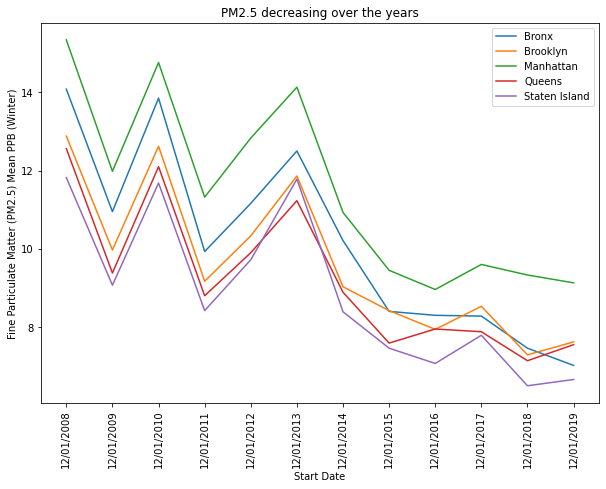

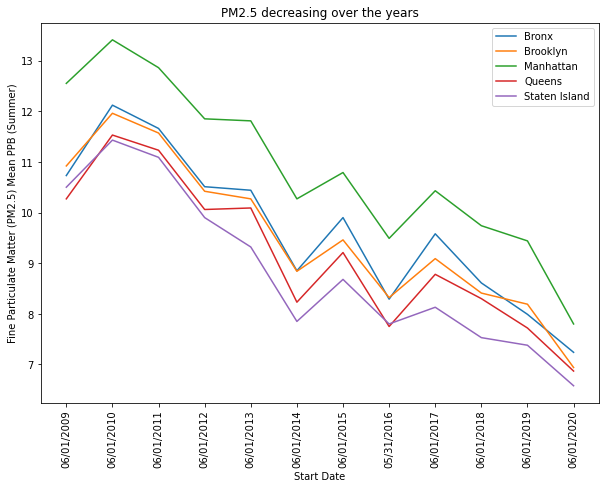

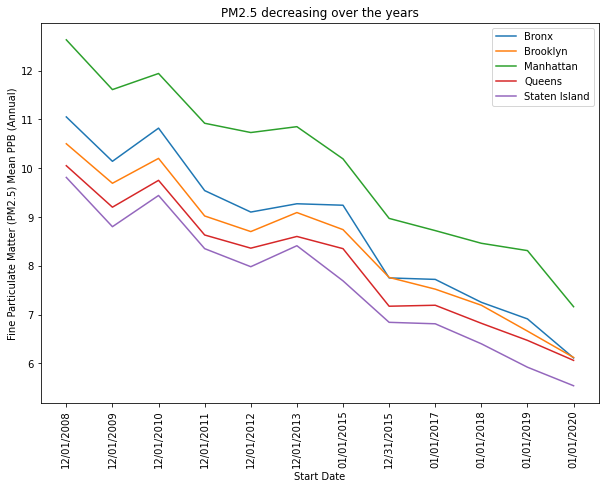

In [116]:
plot_x_y_multiline(winter_PM2, 
                   'Geo Place Name',
                   'Start_Date',
                   'Data Value',
                   'Start Date',
                   'Fine Particulate Matter (PM2.5) Mean PPB (Winter)',
                   'PM2.5 decreasing over the years')

plot_x_y_multiline(summer_PM2, 
                   'Geo Place Name',
                   'Start_Date',
                   'Data Value',
                   'Start Date',
                   'Fine Particulate Matter (PM2.5) Mean PPB (Summer)',
                   'PM2.5 decreasing over the years')

plot_x_y_multiline(annual_PM2, 
                   'Geo Place Name',
                   'Start_Date',
                   'Data Value',
                   'Start Date',
                   'Fine Particulate Matter (PM2.5) Mean PPB (Annual)',
                   'PM2.5 decreasing over the years')

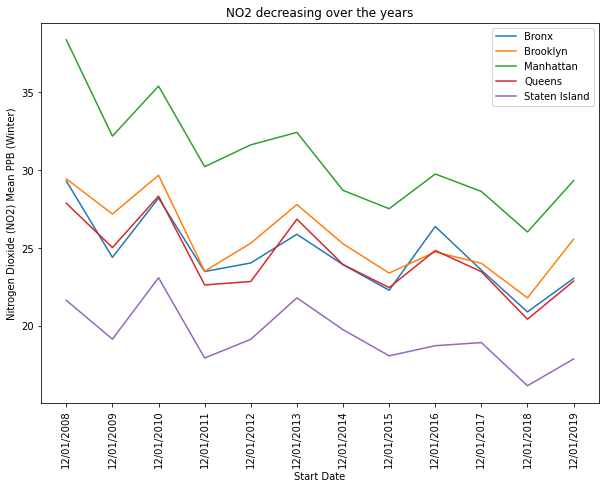

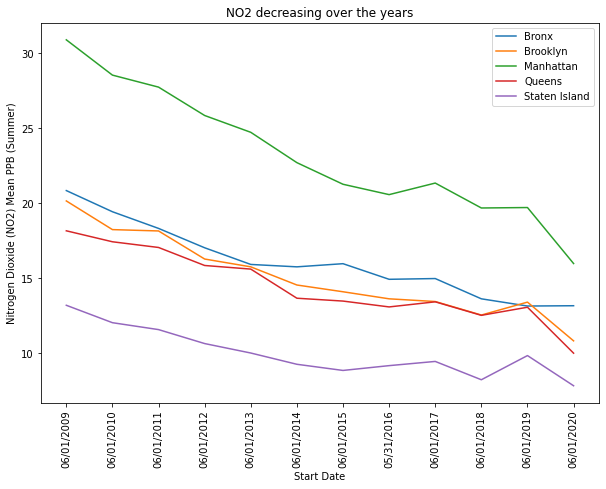

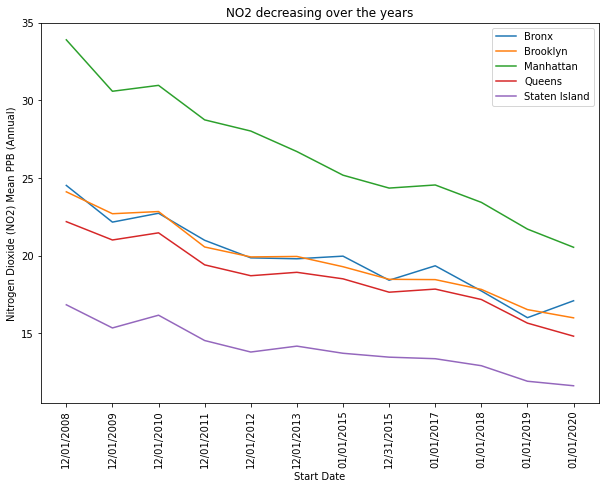

In [115]:
plot_x_y_multiline(winter_NO2, 
                   'Geo Place Name',
                   'Start_Date',
                   'Data Value',
                   'Start Date',
                   'Nitrogen Dioxide (NO2) Mean PPB (Winter)',
                   'NO2 decreasing over the years')

plot_x_y_multiline(summer_NO2, 
                   'Geo Place Name',
                   'Start_Date',
                   'Data Value',
                   'Start Date',
                   'Nitrogen Dioxide (NO2) Mean PPB (Summer)',
                   'NO2 decreasing over the years')

plot_x_y_multiline(annual_NO2, 
                   'Geo Place Name',
                   'Start_Date',
                   'Data Value',
                   'Start Date',
                   'Nitrogen Dioxide (NO2) Mean PPB (Annual)',
                   'NO2 decreasing over the years')

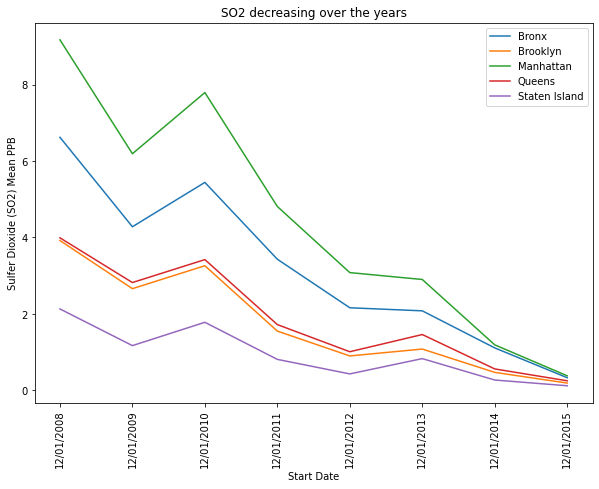

In [113]:
plot_x_y_multiline(SO2_df, 
                   'Geo Place Name',
                   'Start_Date',
                   'Data Value',
                   'Start Date',
                   'Sulfer Dioxide (SO2) Mean PPB',
                   'SO2 decreasing over the years')